In [1]:
%env ROS_IP=192.168.0.17
%env ROS_MASTER_URI=http://192.168.0.17:11311

!export ROS_MASTER_URI=http://192.168.0.17:11311
!export ROS_IP=192.168.0.17

!echo $ROS_IP
!echo $ROS_MASTER_URI


env: ROS_IP=192.168.0.17
env: ROS_MASTER_URI=http://192.168.0.17:11311
192.168.0.17
http://192.168.0.17:11311


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
cam = LocobotCamera(use_simulation=False)


Unable to register with master node [http://192.168.0.17:11311]: master may not be running yet. Will keep trying.


In [ ]:
arm_control = LocobotArmControl(use_simulation=False)


[INFO] [1745964681.296392]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745964681.303874]: Joint‐space action server ready
[ INFO] [1745964681.860222431]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745964682.362284]: LocobotArmControl initialized


In [ ]:
arm_control.open_gripper()

In [ ]:
arm_control.close_gripper()

[WARN] [1745962004.344351]: ❌ No object detected before fully closed


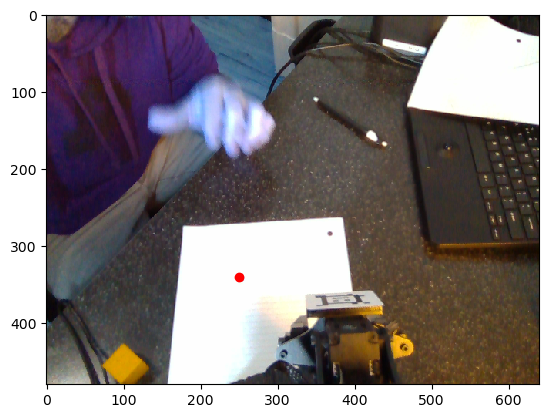

In [ ]:
# Example: Grab cube at center of image
# cam.pan(0.0)
# cam.tilt(1.1)
height, width = cam.image.shape[:2]
center_x = 250
center_y = 340

plt.imshow(cam.image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

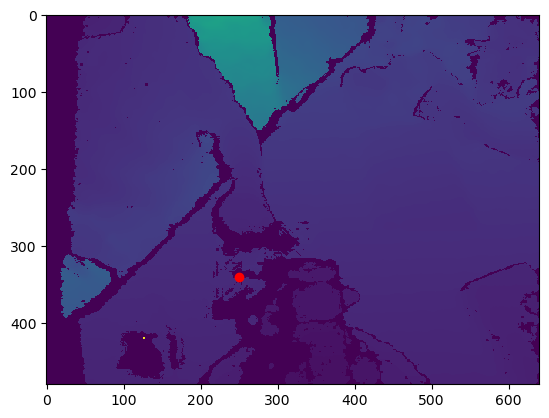

In [ ]:
plt.imshow(cam.depth_image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

In [ ]:
point_cam = cam.depth_to_xyz(center_x, center_y)
print(point_cam)

point_base = cam.get_target_coordinate_from_camera(point_cam)
print(point_base)

AttributeError: 'NoneType' object has no attribute 'cx'

In [12]:
point_base = transform_point_to_base_frame(point_cam, target_frame="locobot/base_footprint",  source_frame="locobot/camera_depth_optical_frame")
print(point_base)

[0.26823807639456826, 0.12277341026929414, 0.010638087968267262]


In [13]:
print(f"Point in base frame: {point_base}")

arm_control.pick(point_base, size=0.03)

Point in base frame: [0.26823807639456826, 0.12277341026929414, 0.010638087968267262]


object detected


In [14]:
point_base_2 = point_base + np.array([0.1, 0.1, 0.03])
arm_control.place(point_base_2, size=0.03)
arm_control.open_gripper()

In [ ]:
arm_control.